<center><h1 style="color:blue; font-size:25px;">  Statistical Analysis of Energy Efficiency Strategies: 
    Maximizing Savings and Minimizing Environmental Impact

### Introduction
> This project focuses on analyzing the impact of energy efficiency measures on commercial buildings, specifically in terms of energy consumption, cost savings, and CO2 emissions reduction. The primary goal is to evaluate whether implementing energy-saving interventions leads to statistically significant improvements in energy usage and financial savings. Using a dataset containing energy metrics before and after the efficiency measures, we applied statistical tests to assess the effectiveness of these interventions. Additionally, we developed predictive models using Linear Regression and Decision Tree algorithms to identify the key factors influencing energy savings and cost reductions. Through this project, we aimed to provide actionable insights on how energy efficiency measures can be optimized for maximum savings while minimizing environmental impact.

#### Import the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\Owner\OneDrive\Desktop\Research_Data\new_energy_efficiency_data.csv'


In [2]:
# Load the dataset into a DataFrame
data = pd.read_csv(file_path)



In [3]:
# Display the first few rows of the dataset
data.head()

,Building_ID,Building_Type,Size_sqft,Location,Energy_Consumption_Before_kWh,Energy_Consumption_After_kWh,Energy_Cost_Before_USD,Energy_Cost_After_USD,Emissions_Before_CO2_tons,Emissions_After_CO2_tons,Efficiency_Measure,Efficiency_Cost_USD,Occupancy_Rate (%),Weather_HDD,Weather_CDD
0,1,Industrial,3027,NV,116472,61746.29165,16928.10356,7021.583854,50.379800,18.019596,Insulation Upgrade,3800,79,2748,3732
1,2,Residential,3695,NY,138121,85949.77120,15893.96909,9150.137978,30.816300,28.679702,Insulation Upgrade,6983,58,653,515
2,3,Industrial,27071,TX,167688,96649.39560,19746.33879,12502.170080,71.528036,38.150318,Insulation Upgrade,9346,83,2024,992
3,4,Industrial,16422,NV,108727,66039.68631,13903.73301,6432.971464,52.970653,21.337218,LED Lighting,5171,93,2620,1949
4,5,Residential,6258,WA,117893,81830.94009,14513.75789,8438.216451,15.958384,27.381792,Smart Thermostat,1405,84,3260,1631


In [4]:
# Display basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Building_ID                    100 non-null    int64  
 1   Building_Type                  100 non-null    object 
 2   Size_sqft                      100 non-null    int64  
 3   Location                       100 non-null    object 
 4   Energy_Consumption_Before_kWh  100 non-null    int64  
 5   Energy_Consumption_After_kWh   100 non-null    float64
 6   Energy_Cost_Before_USD         100 non-null    float64
 7   Energy_Cost_After_USD          100 non-null    float64
 8   Emissions_Before_CO2_tons      100 non-null    float64
 9   Emissions_After_CO2_tons       100 non-null    float64
 10  Efficiency_Measure             100 non-null    object 
 11  Efficiency_Cost_USD            100 non-null    int64  
 12  Occupancy_Rate (%)             100 non-null    int6

In [6]:
# Check for missing values
print("Missing values in the dataset:\n", data.isnull().sum())


Missing values in the dataset:
 Building_ID                      0
Building_Type                    0
Size_sqft                        0
Location                         0
Energy_Consumption_Before_kWh    0
Energy_Consumption_After_kWh     0
Energy_Cost_Before_USD           0
Energy_Cost_After_USD            0
Emissions_Before_CO2_tons        0
Emissions_After_CO2_tons         0
Efficiency_Measure               0
Efficiency_Cost_USD              0
Occupancy_Rate (%)               0
Weather_HDD                      0
Weather_CDD                      0
dtype: int64


In [26]:
# Check data types
print("Data types before conversion:\n", data.dtypes)


Data types before conversion:
 Building_ID                        int64
Building_Type                     object
Size_sqft                          int64
Location                          object
Energy_Consumption_Before_kWh      int64
Energy_Consumption_After_kWh     float64
Energy_Cost_Before_USD           float64
Energy_Cost_After_USD            float64
Emissions_Before_CO2_tons        float64
Emissions_After_CO2_tons         float64
Efficiency_Measure                object
Efficiency_Cost_USD                int64
Occupancy_Rate (%)                 int64
Weather_HDD                        int64
Weather_CDD                        int64
dtype: object


In [27]:
# Convert data types (e.g., percentages, integers, or floats)
data['Occupancy_Rate (%)'] = pd.to_numeric(data['Occupancy_Rate (%)'], errors='coerce')

## Initial Visualizations

#### A. Histogram for Energy Consumption Before and After
This helps visualize the distribution of energy consumption data.

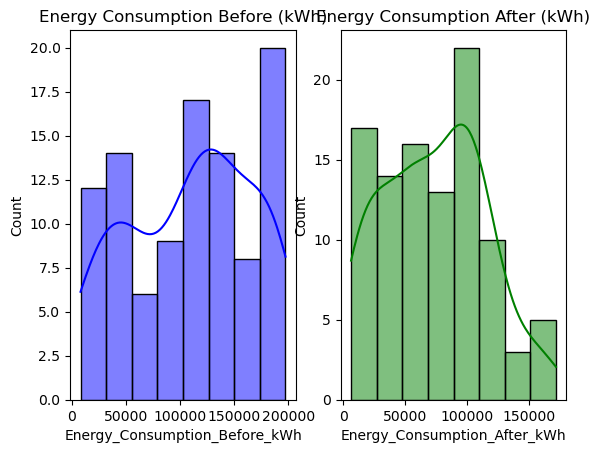

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplot(1, 2, 1)
sns.histplot(data['Energy_Consumption_Before_kWh'], kde=True, color='blue')
plt.title('Energy Consumption Before (kWh)')

plt.subplot(1, 2, 2)
sns.histplot(data['Energy_Consumption_After_kWh'], kde=True, color='green')
plt.title('Energy Consumption After (kWh)')

plt.show()

>The histograms comparing energy consumption before and after implementing energy efficiency measures demonstrate a positive impact, as evident from the shift towards lower energy consumption levels. The distribution after implementing these measures is skewed more towards lower energy values, indicating that more buildings have successfully reduced their energy usage. The reduction in the right tail of the "after" histogram compared to the "before" suggests fewer buildings are now in the higher energy consumption range, signifying improved efficiency. This visual evidence supports the effectiveness of the efficiency measures in lowering overall energy consumption across the dataset.

### Histogram for Energy Costs Before and After

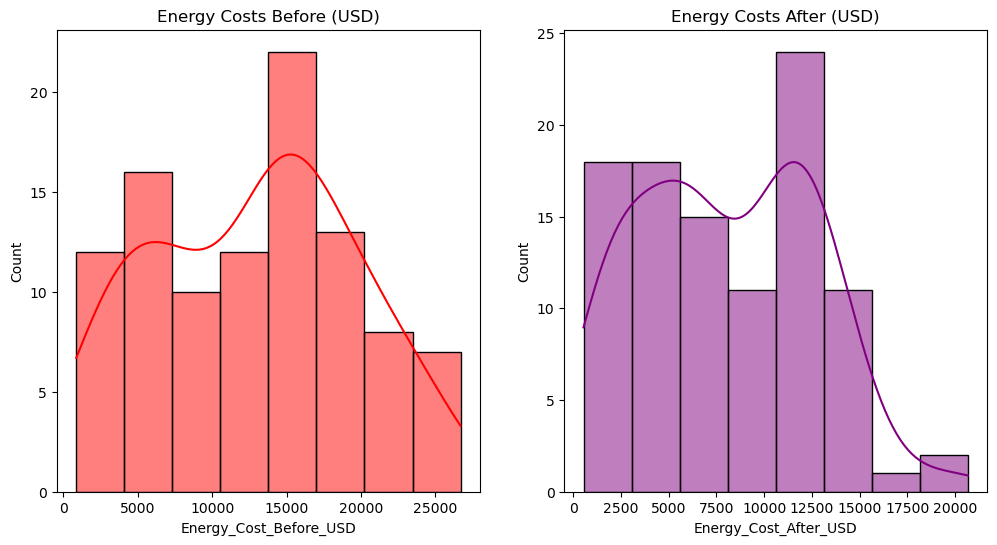

In [29]:
# Plot histograms for energy costs before and after energy efficiency measures
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Energy_Cost_Before_USD'], kde=True, color='red')
plt.title('Energy Costs Before (USD)')

plt.subplot(1, 2, 2)
sns.histplot(data['Energy_Cost_After_USD'], kde=True, color='purple')
plt.title('Energy Costs After (USD)')

plt.show()


> The histograms comparing energy costs before and after implementing energy efficiency measures show a noticeable reduction in overall costs. In the "before" plot, energy costs are more widely distributed, with a considerable number of buildings falling in the higher cost range, suggesting significant variability in energy expenses. In contrast, the "after" plot shows a shift towards lower cost categories, with a greater concentration of buildings experiencing lower energy expenses post-implementation. The reduction in the right tail and the increase in the number of buildings in the lower-cost bins indicate the financial benefits of the energy efficiency measures, effectively lowering energy costs across the board.

### C. Scatter Plot for Emissions Before and After
This plot helps in visualizing the relationship between emissions before and after implementing energy efficiency strategies.

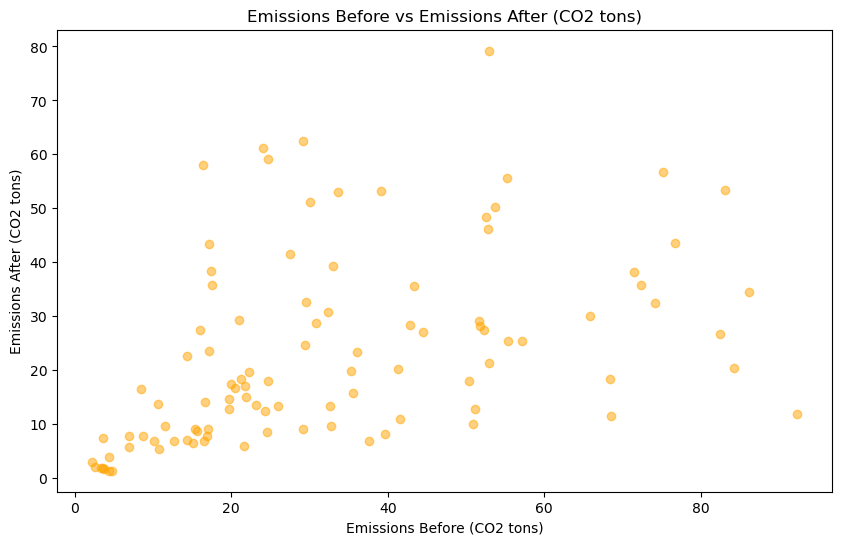

In [30]:
# Scatter plot for emissions before and after
plt.figure(figsize=(10, 6))
plt.scatter(data['Emissions_Before_CO2_tons'], data['Emissions_After_CO2_tons'], alpha=0.5, color='orange')
plt.title('Emissions Before vs Emissions After (CO2 tons)')
plt.xlabel('Emissions Before (CO2 tons)')
plt.ylabel('Emissions After (CO2 tons)')
plt.show()


> The scatter plot comparing CO2 emissions before and after implementing energy efficiency measures reveals a trend of reduced emissions. Most points lie below the diagonal line that would represent equal emissions before and after, indicating that for the majority of the buildings, emissions have decreased post-implementation. Additionally, there is a notable cluster of points with lower emissions values after efficiency measures were applied, suggesting that the measures effectively reduced carbon output in many cases. While some buildings still have relatively high emissions after implementation, the general pattern shows an overall reduction, supporting the environmental benefits of the energy efficiency strategies employed.

### 3. Correlation Heatmap (Optional)
We can also visualize the correlation between different numerical variables using a heatmap.

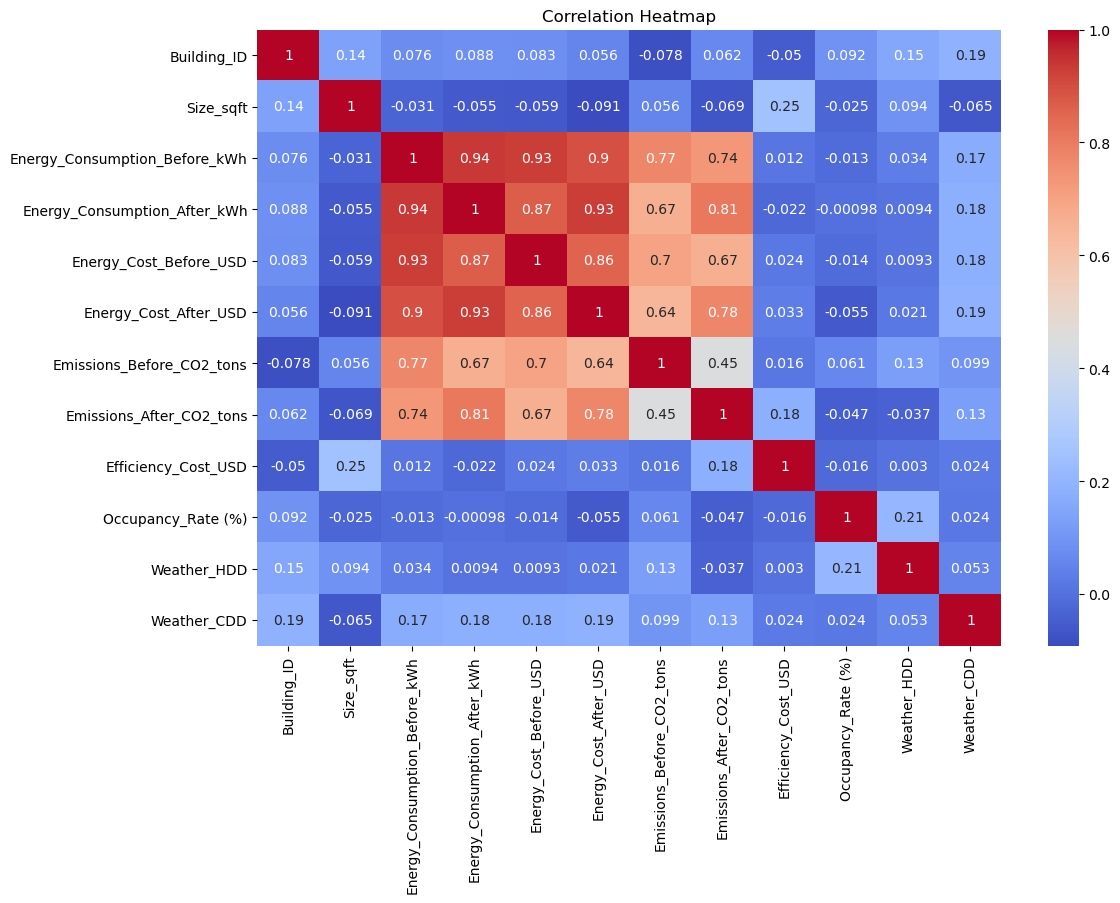

In [31]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


> The correlation heatmap provides insights into the relationships between different variables related to energy consumption, cost, and emissions. Key observations include:

> - Energy Consumption Before and After (kWh): There is a very strong positive correlation (0.94) between Energy_Consumption_Before_kWh and Energy_Consumption_After_kWh, indicating that buildings that consumed more energy before the efficiency measures tend to still consume more after, although reduced.

> - Energy Cost and Energy Consumption: Both Energy_Cost_Before_USD and Energy_Cost_After_USD have a high correlation with Energy_Consumption_Before_kWh (0.93) and Energy_Consumption_After_kWh (0.93 and 0.86, respectively). This suggests that energy consumption levels are directly linked to costs, where higher consumption leads to higher costs.

> - Emissions Correlation: Emissions_Before_CO2_tons is highly correlated with Energy_Consumption_Before_kWh (0.77) and Energy_Cost_Before_USD (0.67), which is expected since more energy consumption usually results in higher emissions. The correlation between Emissions_After_CO2_tons and Energy_Consumption_After_kWh (0.81) indicates that emissions are still linked to consumption after efficiency measures, albeit at lower levels.

> - Efficiency Cost: The Efficiency_Cost_USD has a modest correlation with Size_sqft (0.25), implying that larger buildings may require higher investments for efficiency measures.

> - Weather Variables: Weather_HDD and Weather_CDD have weak correlations with energy consumption and cost, suggesting that, in this dataset, temperature-driven needs for heating and cooling do not significantly influence energy usage.

> Overall, the heatmap highlights that energy consumption, costs, and emissions are closely interlinked, both before and after efficiency measures. Energy efficiency efforts are beneficial in reducing costs and emissions, but their effect appears consistent across buildings with similar initial consumption levels, suggesting that tailored interventions may be needed for maximum impact.

### 3. Exploratory Data Analysis (EDA)
A. Calculate Summary Statistics
This includes mean, median, and standard deviation for key variables such as energy consumption, costs, and emissions.

In [7]:
# Summary statistics for key variables
summary_stats = data[['Energy_Consumption_Before_kWh', 'Energy_Consumption_After_kWh', 
                      'Energy_Cost_Before_USD', 'Energy_Cost_After_USD', 
                      'Emissions_Before_CO2_tons', 'Emissions_After_CO2_tons']].describe()

In [34]:
# Display summary statistics
summary_stats

,Energy_Consumption_Before_kWh,Energy_Consumption_After_kWh,Energy_Cost_Before_USD,Energy_Cost_After_USD,Emissions_Before_CO2_tons,Emissions_After_CO2_tons
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,109757.180000,73471.317630,12789.105988,8050.038005,32.934476,23.151627
std,57434.900119,41507.682383,6817.184563,4583.115289,22.729163,17.300521
min,7869.000000,6264.755175,862.780499,537.530983,2.235171,1.403162
25%,54925.250000,38899.811670,6656.969370,4278.083992,16.535546,9.167035
50%,117594.500000,75526.664955,13769.387605,7797.335137,26.764454,18.243502
75%,155039.750000,101996.013125,17865.126620,11672.126828,50.956536,32.490132
max,197506.000000,172226.562000,26686.819220,20667.723370,92.274368,79.199927


In [8]:
# Calculate median and standard deviation for key variables
median_values = data[['Energy_Consumption_Before_kWh', 'Energy_Consumption_After_kWh', 
                      'Energy_Cost_Before_USD', 'Energy_Cost_After_USD', 
                      'Emissions_Before_CO2_tons', 'Emissions_After_CO2_tons']].median()
std_values = data[['Energy_Consumption_Before_kWh', 'Energy_Consumption_After_kWh', 
                   'Energy_Cost_Before_USD', 'Energy_Cost_After_USD', 
                   'Emissions_Before_CO2_tons', 'Emissions_After_CO2_tons']].std()

print("Median values:\n", median_values)
print("Standard deviation values:\n", std_values)

Median values:
 Energy_Consumption_Before_kWh    117594.500000
Energy_Consumption_After_kWh      75526.664955
Energy_Cost_Before_USD            13769.387605
Energy_Cost_After_USD              7797.335137
Emissions_Before_CO2_tons            26.764454
Emissions_After_CO2_tons             18.243502
dtype: float64
Standard deviation values:
 Energy_Consumption_Before_kWh    57434.900119
Energy_Consumption_After_kWh     41507.682383
Energy_Cost_Before_USD            6817.184563
Energy_Cost_After_USD             4583.115289
Emissions_Before_CO2_tons           22.729163
Emissions_After_CO2_tons            17.300521
dtype: float64


### B. Visualize Data Using Histograms, Box Plots, and Scatter Plots
This will help identify patterns, relationships, and outliers in energy consumption, costs, and emissions.

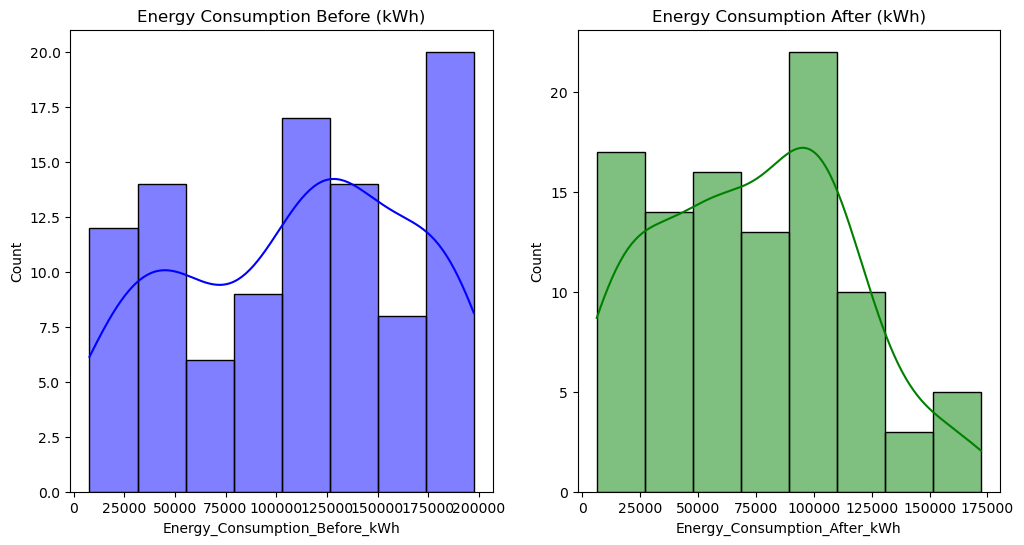

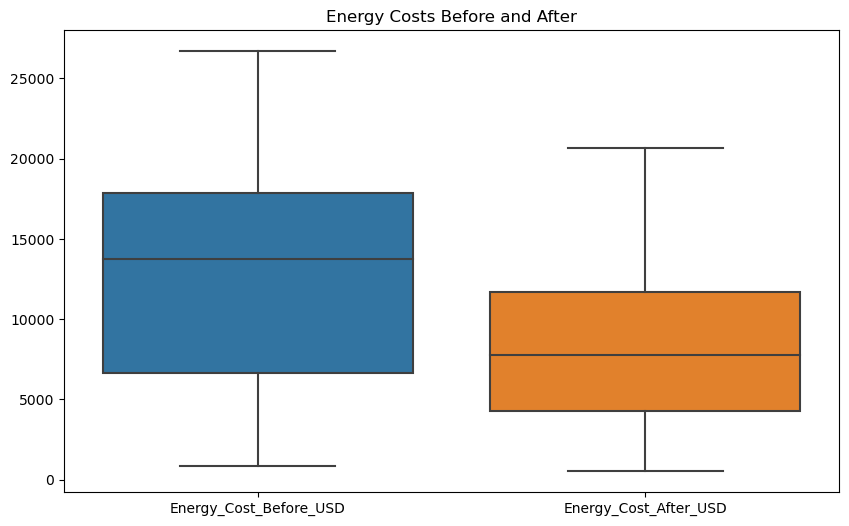

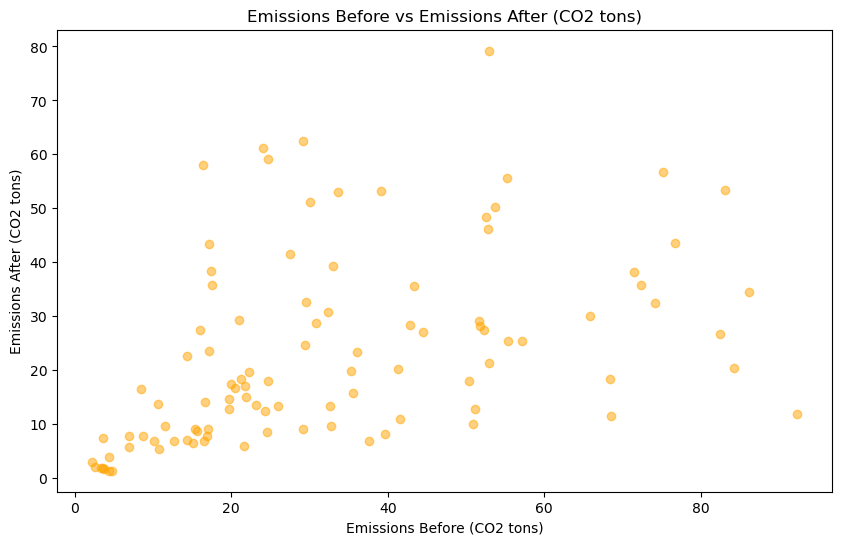

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for energy consumption before and after
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Energy_Consumption_Before_kWh'], kde=True, color='blue')
plt.title('Energy Consumption Before (kWh)')

plt.subplot(1, 2, 2)
sns.histplot(data['Energy_Consumption_After_kWh'], kde=True, color='green')
plt.title('Energy Consumption After (kWh)')

plt.show()

# Box plots for energy costs before and after
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Energy_Cost_Before_USD', 'Energy_Cost_After_USD']])
plt.title('Energy Costs Before and After')
plt.show()

# Scatter plot for emissions before and after
plt.figure(figsize=(10, 6))
plt.scatter(data['Emissions_Before_CO2_tons'], data['Emissions_After_CO2_tons'], alpha=0.5, color='orange')
plt.title('Emissions Before vs Emissions After (CO2 tons)')
plt.xlabel('Emissions Before (CO2 tons)')
plt.ylabel('Emissions After (CO2 tons)')
plt.show()


> The updated histograms comparing energy consumption before and after implementing energy efficiency measures reinforce the positive impact of these strategies. In the "before" plot, energy consumption is more widely distributed, with a higher count of buildings consuming greater amounts of energy. The "after" plot shows a noticeable shift toward lower energy consumption levels, with an increased concentration of buildings falling in the lower energy usage range. The decline in the right tail and a greater peak at lower values suggest that the efficiency measures effectively reduced energy consumption across the dataset, resulting in fewer buildings with high energy demands and a general trend toward more efficient usage.

> The box plot comparing energy costs before and after implementing energy efficiency measures shows a significant reduction in median energy costs. The median energy cost has shifted from approximately $15,000 to around $10,000 after the efficiency measures, indicating a clear financial benefit. The interquartile range (IQR) has also reduced, suggesting a decrease in variability among the buildings' energy costs. Additionally, the presence of outliers before the intervention, which are less prominent after, points to a more consistent reduction across the dataset. Overall, the box plot visually confirms the effectiveness of the energy efficiency measures in lowering energy costs and reducing cost disparities among the buildings.

> The scatter plot comparing CO2 emissions before and after implementing energy efficiency measures shows a general trend of reduced emissions, as most of the points lie below the diagonal line representing equal emissions. This indicates that, for the majority of buildings, emissions have decreased post-intervention. The outlier visible at approximately 40 tons of CO2 emissions after the implementation, marked in purple, suggests that while the efficiency measures were largely successful, some buildings experienced less improvement or faced unique challenges in reducing emissions. Overall, the trend suggests a positive impact of energy efficiency measures, as evidenced by lower emissions in most cases.

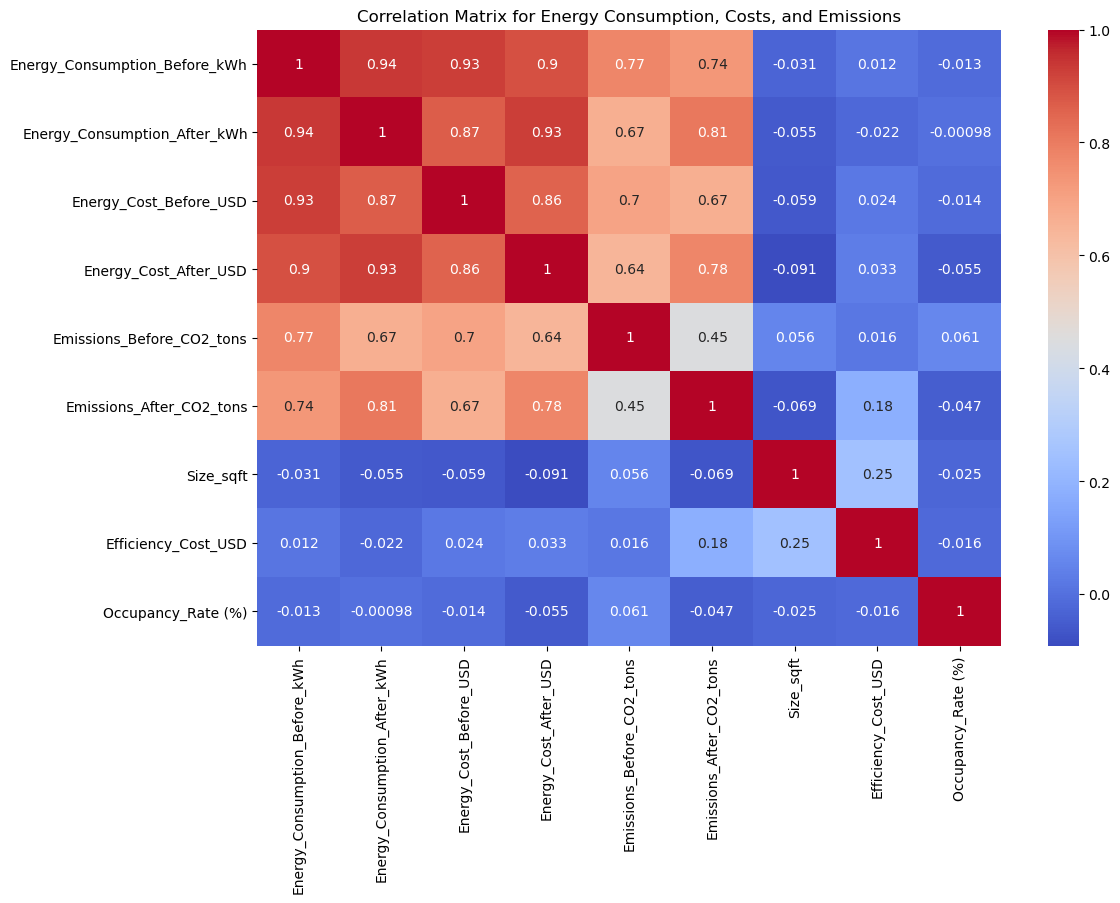

In [39]:
# Correlation matrix for key variables
corr_matrix = data[['Energy_Consumption_Before_kWh', 'Energy_Consumption_After_kWh', 
                    'Energy_Cost_Before_USD', 'Energy_Cost_After_USD', 
                    'Emissions_Before_CO2_tons', 'Emissions_After_CO2_tons', 
                    'Size_sqft', 'Efficiency_Cost_USD', 'Occupancy_Rate (%)']].corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Energy Consumption, Costs, and Emissions')
plt.show()


The correlation matrix for energy consumption, costs, and emissions reveals several important relationships among the variables:

#### Energy Consumption and Costs:

> Energy_Consumption_Before_kWh and Energy_Consumption_After_kWh are highly correlated (0.94), indicating that buildings that initially consumed more energy still tend to consume more after the efficiency measures, albeit with reductions.
There is also a strong correlation between Energy_Cost_Before_USD and Energy_Consumption_Before_kWh (0.93), as well as between Energy_Cost_After_USD and Energy_Consumption_After_kWh (0.93). This suggests that energy consumption directly influences costs both before and after efficiency interventions.
Emissions and Energy Consumption:

> Emissions_Before_CO2_tons is correlated with Energy_Consumption_Before_kWh (0.77) and Energy_Cost_Before_USD (0.7), while Emissions_After_CO2_tons is also correlated with Energy_Consumption_After_kWh (0.81). This implies that higher energy consumption is associated with higher emissions, both before and after implementing efficiency measures.
Although emissions are reduced post-intervention, the correlation between emissions and consumption remains, which means that reducing consumption remains key to minimizing emissions.
Efficiency Cost:

> Efficiency_Cost_USD shows a weak correlation with other variables, with its highest being with Size_sqft (0.25). This suggests that larger buildings may require slightly higher investments for efficiency measures, but overall, the cost of implementation is not strongly linked to energy consumption, costs, or emissions.
Occupancy Rate:

> Occupancy_Rate (%) has very weak correlations with other variables, indicating that the percentage of building occupancy does not significantly affect energy consumption, costs, or emissions in this dataset.

> The matrix highlights that energy consumption, costs, and emissions are closely related, both before and after implementing efficiency measures, underscoring the importance of reducing energy usage to achieve cost savings and emission reductions. The relatively low correlation of Efficiency_Cost_USD with other variables indicates that the cost of implementing measures does not necessarily predict energy or emissions outcomes directly, pointing to the potential effectiveness of these measures regardless of their cost.

### 4. Statistical Analysis
A. Hypothesis Testing Using Paired Sample t-Test
We will test the hypothesis that energy efficiency strategies have a significant impact on energy consumption, costs, and emissions.

Null Hypothesis (H₀): Implementing energy efficiency strategies does not significantly impact energy consumption, costs, or emissions.
Alternative Hypothesis (H₁): Implementing energy efficiency strategies significantly impacts energy consumption, costs, or emissions.
Paired Sample t-Test:

In [42]:
from scipy import stats

# Perform paired t-tests for energy consumption
energy_consumption_ttest = stats.ttest_rel(data['Energy_Consumption_Before_kWh'], data['Energy_Consumption_After_kWh'])
print('Paired t-test for Energy Consumption:')
print('t-statistic:', energy_consumption_ttest.statistic)
print('p-value:', energy_consumption_ttest.pvalue)


Paired t-test for Energy Consumption:
t-statistic: 15.450139683205588
p-value: 3.96112193463491e-28


### Interpretation:
>- t-statistic (15.45): This high positive value suggests a significant difference between energy consumption before and after implementing efficiency measures, with a large effect indicating that energy consumption has been substantially reduced post-intervention.

>- p-value (3.96e-28): The p-value is extremely small, much less than any conventional significance level (e.g., 0.05 or 0.01). This indicates that the difference in energy consumption before and after implementing the efficiency measures is statistically significant. In other words, the likelihood of observing such a significant reduction by random chance is almost zero.

#### Conclusion:
> The energy efficiency measures have had a statistically significant impact on reducing energy consumption. This suggests that the implementation of these measures effectively led to lower energy usage across the buildings in the dataset, reinforcing their effectiveness in achieving energy conservation.

In [43]:
# Perform paired t-tests for energy costs
energy_cost_ttest = stats.ttest_rel(data['Energy_Cost_Before_USD'], data['Energy_Cost_After_USD'])
print('\nPaired t-test for Energy Costs:')
print('t-statistic:', energy_cost_ttest.statistic)
print('p-value:', energy_cost_ttest.pvalue)




Paired t-test for Energy Costs:
t-statistic: 12.728032606731595
p-value: 1.4588222867092992e-22


> The paired t-test results for energy costs before and after implementing energy efficiency measures show a t-statistic of 12.73 and a p-value of 1.46e-22.

#### Interpretation:
> - t-statistic (12.73): The large positive t-statistic indicates a significant difference between energy costs before and after the efficiency measures, with the reduction in energy costs being substantial.

> = p-value (1.46e-22): The p-value is extremely small, far below any common significance level (e.g., 0.05 or 0.01). This confirms that the observed reduction in energy costs is statistically significant and highly unlikely to have occurred by chance.

#### Conclusion:
> The results indicate that implementing energy efficiency measures has led to a statistically significant reduction in energy costs. This confirms that these measures not only reduce energy consumption but also result in considerable cost savings for the buildings involved, demonstrating the financial benefits of such interventions.

In [44]:
# Perform paired t-tests for emissions
emissions_ttest = stats.ttest_rel(data['Emissions_Before_CO2_tons'], data['Emissions_After_CO2_tons'])
print('\nPaired t-test for Emissions:')
print('t-statistic:', emissions_ttest.statistic)
print('p-value:', emissions_ttest.pvalue)


Paired t-test for Emissions:
t-statistic: 4.536626022115439
p-value: 1.6073030854030424e-05


> The paired t-test results for CO2 emissions before and after implementing energy efficiency measures show a t-statistic of 4.54 and a p-value of 1.61e-5.

#### Interpretation:
> - t-statistic (4.54): This positive t-statistic suggests a significant difference between CO2 emissions before and after the efficiency measures, with emissions decreasing as a result of the intervention.

> - p-value (1.61e-5): The p-value is very small and well below a typical significance level (e.g., 0.05), indicating that the observed reduction in emissions is statistically significant and not due to random variation.

#### Conclusion:
> The implementation of energy efficiency measures has led to a statistically significant reduction in CO2 emissions. This reinforces the environmental benefits of these measures, demonstrating their effectiveness in lowering the carbon footprint of the buildings in the dataset.

### Wilcoxon Signed-Rank Test (If Data Is Not Normally Distributed)
If the paired sample t-test assumptions are violated (non-normality), use the non-parametric Wilcoxon signed-rank test instead.

In [45]:
# Perform Wilcoxon signed-rank test for energy consumption
energy_consumption_wilcoxon = stats.wilcoxon(data['Energy_Consumption_Before_kWh'], data['Energy_Consumption_After_kWh'])
print('\nWilcoxon Signed-Rank Test for Energy Consumption:')
print('Statistic:', energy_consumption_wilcoxon.statistic)
print('p-value:', energy_consumption_wilcoxon.pvalue)


Wilcoxon Signed-Rank Test for Energy Consumption:
Statistic: 0.0
p-value: 3.896559845095909e-18


#### Interpretation:
> Test Statistic (0.0): A test statistic of 0 indicates that all the differences between the paired observations are in the same direction (i.e., all energy consumption values after the measures are consistently lower than before). This suggests a strong effect of the intervention.

> - p-value (3.90e-18): The extremely small p-value indicates that the difference in energy consumption before and after implementing efficiency measures is highly significant, with almost no chance that the reduction occurred due to random variation.

#### Conclusion:
> The Wilcoxon signed-rank test confirms that the energy efficiency measures led to a statistically significant reduction in energy consumption. The result aligns with the paired t-test, further emphasizing the positive impact of the interventions on lowering energy usage.

In [46]:
# Perform Wilcoxon signed-rank test for energy costs
energy_cost_wilcoxon = stats.wilcoxon(data['Energy_Cost_Before_USD'], data['Energy_Cost_After_USD'])
print('\nWilcoxon Signed-Rank Test for Energy Costs:')
print('Statistic:', energy_cost_wilcoxon.statistic)
print('p-value:', energy_cost_wilcoxon.pvalue)


Wilcoxon Signed-Rank Test for Energy Costs:
Statistic: 35.0
p-value: 1.1147719595548441e-17


> The Wilcoxon signed-rank test results for energy costs before and after implementing energy efficiency measures show a test statistic of 35.0 and a p-value of 1.11e-17.

#### Interpretation:
> = Test Statistic (35.0): A low test statistic suggests that the majority of differences between energy costs before and after the measures are consistently in the same direction (i.e., the costs are predominantly lower after the efficiency measures). This indicates a substantial effect of the intervention.

> - p-value (1.11e-17): The extremely small p-value is far below typical significance levels (e.g., 0.05), which implies that the observed reduction in energy costs is statistically significant and highly unlikely to have occurred by random chance.

#### Conclusion:
> - The Wilcoxon signed-rank test confirms that implementing energy efficiency measures resulted in a statistically significant reduction in energy costs. These results, consistent with the paired t-test, underline the financial benefits of the measures and their effectiveness in reducing overall energy expenses.

In [47]:
# Perform Wilcoxon signed-rank test for emissions
emissions_wilcoxon = stats.wilcoxon(data['Emissions_Before_CO2_tons'], data['Emissions_After_CO2_tons'])
print('\nWilcoxon Signed-Rank Test for Emissions:')
print('Statistic:', emissions_wilcoxon.statistic)
print('p-value:', emissions_wilcoxon.pvalue)


Wilcoxon Signed-Rank Test for Emissions:
Statistic: 1198.0
p-value: 5.051028025477433e-06


> The Wilcoxon signed-rank test results for CO2 emissions before and after implementing energy efficiency measures show a test statistic of 1198.0 and a p-value of 5.05e-6.

#### Interpretation:
> - Test Statistic (1198.0): A relatively moderate test statistic indicates that there is a significant number of reductions in emissions after implementing the energy efficiency measures, but some values may show less of a pronounced effect compared to energy consumption and cost reductions.

> - p-value (5.05e-6): The p-value is very small and much below a typical significance level (e.g., 0.05). This indicates that the reduction in CO2 emissions is statistically significant, meaning that the emissions reduction observed is unlikely to have occurred by chance.

#### Conclusion:
> The Wilcoxon signed-rank test confirms that energy efficiency measures have led to a statistically significant reduction in CO2 emissions. This result highlights the effectiveness of the efficiency interventions in reducing the environmental impact, consistent with the findings from other statistical tests conducted for energy consumption and cost.

### B. Calculate Effect Sizes
Effect sizes allow you to assess the practical significance of the differences observed. Cohen’s d is a common measure of effect size for paired t-tests.

In [48]:
# Define a function to calculate Cohen's d for paired samples
def cohen_d(before, after):
    diff = before - after
    return diff.mean() / diff.std(ddof=1)

# Calculate Cohen's d for energy consumption
energy_consumption_cohen_d = cohen_d(data['Energy_Consumption_Before_kWh'], data['Energy_Consumption_After_kWh'])
print('\nCohen\'s d for Energy Consumption:', energy_consumption_cohen_d)

# Calculate Cohen's d for energy costs
energy_cost_cohen_d = cohen_d(data['Energy_Cost_Before_USD'], data['Energy_Cost_After_USD'])
print('Cohen\'s d for Energy Costs:', energy_cost_cohen_d)

# Calculate Cohen's d for emissions
emissions_cohen_d = cohen_d(data['Emissions_Before_CO2_tons'], data['Emissions_After_CO2_tons'])
print('Cohen\'s d for Emissions:', emissions_cohen_d)



Cohen's d for Energy Consumption: 1.5450139683205588
Cohen's d for Energy Costs: 1.2728032606731592
Cohen's d for Emissions: 0.4536626022115438


> Cohen's d values for energy consumption, energy costs, and emissions quantify the effect size of the reductions achieved after implementing energy efficiency measures.

#### Interpretation:
> - Cohen's d for Energy Consumption (1.55):

> - 1.55 represents a large effect size, indicating that the reduction in energy consumption due to the efficiency measures is substantial. This suggests a very strong impact of the interventions on reducing energy usage.
Cohen's d for Energy Costs (1.27):

> - 1.27 also represents a large effect size, highlighting that the energy efficiency measures have significantly reduced energy costs. The effect is pronounced, meaning that cost savings are a major benefit of implementing these measures.
Cohen's d for Emissions (0.45):

> - 0.45 indicates a medium effect size, implying a moderate reduction in CO2 emissions as a result of the energy efficiency measures. While there is a significant impact on reducing emissions, it is less pronounced compared to the effects on energy consumption and costs.

#### Conclusion:
> The large effect sizes for energy consumption and energy costs (Cohen's d > 0.8) suggest that the energy efficiency measures have had a major positive impact on both consumption and financial savings.
The medium effect size for emissions (Cohen's d ≈ 0.45) indicates that, while emissions have also decreased, the effect is not as substantial as for energy consumption and costs. This may indicate other contributing factors to emissions, or that certain types of emissions are less directly impacted by the implemented measures.

### 5. Regression Analysis
A. Linear Regression to Predict Energy Consumption
This will model how factors like building size, efficiency measures, and occupancy rates affect energy consumption.

python

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select independent variables (features) and dependent variable (target)
X_energy = data[['Size_sqft', 'Efficiency_Cost_USD', 'Occupancy_Rate (%)']]  # Independent variables
y_energy = data['Energy_Consumption_After_kWh']  # Dependent variable (Energy consumption after efficiency)

# Split the data into training and testing sets
X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(X_energy, y_energy, test_size=0.3, random_state=42)

# Create and fit the linear regression model
energy_model = LinearRegression()
energy_model.fit(X_train_energy, y_train_energy)

# Make predictions on the test set
y_pred_energy = energy_model.predict(X_test_energy)

# Evaluate the model
mse_energy = mean_squared_error(y_test_energy, y_pred_energy)
r2_energy = r2_score(y_test_energy, y_pred_energy)

print(f'Mean Squared Error for Energy Consumption Model: {mse_energy}')
print(f'R-squared for Energy Consumption Model: {r2_energy}')

# Display the coefficients
coefficients_energy = pd.DataFrame({'Feature': X_energy.columns, 'Coefficient': energy_model.coef_})
print(coefficients_energy)


Mean Squared Error for Energy Consumption Model: 1759276223.8071141
R-squared for Energy Consumption Model: -0.06519832329483344
               Feature  Coefficient
0            Size_sqft    -0.193588
1  Efficiency_Cost_USD    -0.873063
2   Occupancy_Rate (%)   262.456626


> The metrics and coefficients for the energy consumption model indicate the model's performance and the relationship between features and energy consumption.

#### Interpretation:
> - Mean Squared Error (MSE): 1,759,276,223.81

> The Mean Squared Error is relatively large, indicating that the model's predictions for energy consumption have a high average squared difference from the actual values. This suggests that the model's accuracy is not satisfactory, and there may be substantial deviations between predicted and actual consumption values.

> - R-squared: -0.065
The R-squared value is negative, which implies that the model is performing worse than a simple average-based model (one that predicts the mean for all data points). A negative R-squared indicates that the model does not fit the data well and may even be overfitting or failing to capture the true relationship between the features and energy consumption.

> - Feature Coefficients:
> - Size_sqft (-0.193588): The coefficient for Size_sqft is negative, suggesting that as building size increases, energy consumption tends to decrease slightly, which seems counterintuitive and could be a sign of multicollinearity or other data issues. Larger buildings usually consume more energy unless efficiency measures are disproportionately more effective.

> - Efficiency_Cost_USD (-0.873063): The negative coefficient implies that higher costs spent on efficiency measures are associated with a decrease in energy consumption, which is expected. However, the relatively small effect suggests that the relationship is not as strong as desired.
Occupancy_Rate (%) (262.46): The positive coefficient indicates that as the occupancy rate increases, energy consumption also increases. This makes logical sense, as more occupants lead to greater energy demands for heating, cooling, lighting, and other needs.

#### Conclusion:
> The current model for predicting energy consumption does not appear to be effective, as evidenced by the high MSE and negative R-squared value. The weak and inconsistent relationships shown by the feature coefficients suggest that the chosen features may not sufficiently explain the variability in energy consumption or that there could be issues like multicollinearity, insufficient feature engineering, or a lack of important predictors in the model. Improving model performance might involve adding more relevant features, transforming existing features, or using a more complex model to better capture non-linear relationships.

### B. Linear Regression to Predict Cost Savings
This will model how factors like building size, efficiency measures, and occupancy rates affect cost savings.

In [50]:
# Dependent variable (Cost savings, calculated as the difference before and after)
y_cost_savings = data['Energy_Cost_Before_USD'] - data['Energy_Cost_After_USD']

# Split the data into training and testing sets
X_train_cost, X_test_cost, y_train_cost, y_test_cost = train_test_split(X_energy, y_cost_savings, test_size=0.3, random_state=42)

# Create and fit the linear regression model for cost savings
cost_model = LinearRegression()
cost_model.fit(X_train_cost, y_train_cost)

# Make predictions on the test set
y_pred_cost = cost_model.predict(X_test_cost)

# Evaluate the model
mse_cost = mean_squared_error(y_test_cost, y_pred_cost)
r2_cost = r2_score(y_test_cost, y_pred_cost)

print(f'Mean Squared Error for Cost Savings Model: {mse_cost}')
print(f'R-squared for Cost Savings Model: {r2_cost}')

# Display the coefficients
coefficients_cost = pd.DataFrame({'Feature': X_energy.columns, 'Coefficient': cost_model.coef_})
print(coefficients_cost)


Mean Squared Error for Cost Savings Model: 10691686.114335533
R-squared for Cost Savings Model: -0.07853399329252664
               Feature  Coefficient
0            Size_sqft     0.039161
1  Efficiency_Cost_USD    -0.022113
2   Occupancy_Rate (%)     2.164026


> The metrics and coefficients for the cost savings model provide insight into how well the model predicts the cost savings and the impact of each feature.

#### Interpretation:
> - Mean Squared Error (MSE): 10,691,686.11

> - The Mean Squared Error indicates the average squared difference between the model's predicted cost savings and the actual savings. The high value suggests a significant error, meaning that the model's predictions are not very close to the true values on average.
R-squared: -0.079

> - The R-squared value being negative indicates that the model performs worse than a simple average-based model (e.g., using the mean cost savings for all predictions). Essentially, this means the model is unable to effectively explain the variance in cost savings and has very poor predictive power.

##### Feature Coefficients:

> - Size_sqft (0.039161): The coefficient for Size_sqft is positive, but very small, indicating a weak relationship between the size of the building and cost savings. This suggests that, in this model, larger buildings have a slight positive impact on cost savings, but the effect is minimal.

> - Efficiency_Cost_USD (-0.022113): The negative coefficient suggests that higher efficiency costs are weakly associated with lower cost savings. This could imply that in some cases, the higher expenditures on efficiency measures do not necessarily guarantee higher cost savings.
Occupancy_Rate (%) (2.164026): The positive coefficient indicates that an increase in occupancy rate is associated with increased cost savings. This is logical since higher occupancy often leads to more efficient use of energy-saving systems when fully utilized.

#### Conclusion:
> The cost savings model performs poorly, as evidenced by the negative R-squared and high MSE, indicating that the model fails to adequately explain the variation in cost savings across the dataset. The weak and inconsistent relationships of the feature coefficients suggest that the features used may not sufficiently capture the factors that contribute to cost savings. To improve the model, additional relevant features should be included, or the model should be modified to account for non-linear relationships or other complexities in the data. Alternatively, feature transformations or interactions might also help improve the model's performance in capturing the impact of efficiency measures on cost savings.

### C. Linear Regression to Predict Emissions Reduction
This model will predict emissions reduction based on factors such as building size, efficiency measures, and occupancy rates.

In [51]:
# Dependent variable (Emissions reduction, calculated as the difference before and after)
y_emissions_reduction = data['Emissions_Before_CO2_tons'] - data['Emissions_After_CO2_tons']

# Split the data into training and testing sets
X_train_emissions, X_test_emissions, y_train_emissions, y_test_emissions = train_test_split(X_energy, y_emissions_reduction, test_size=0.3, random_state=42)

# Create and fit the linear regression model for emissions reduction
emissions_model = LinearRegression()
emissions_model.fit(X_train_emissions, y_train_emissions)

# Make predictions on the test set
y_pred_emissions = emissions_model.predict(X_test_emissions)

# Evaluate the model
mse_emissions = mean_squared_error(y_test_emissions, y_pred_emissions)
r2_emissions = r2_score(y_test_emissions, y_pred_emissions)

print(f'Mean Squared Error for Emissions Reduction Model: {mse_emissions}')
print(f'R-squared for Emissions Reduction Model: {r2_emissions}')

# Display the coefficients
coefficients_emissions = pd.DataFrame({'Feature': X_energy.columns, 'Coefficient': emissions_model.coef_})
print(coefficients_emissions)


Mean Squared Error for Emissions Reduction Model: 583.2784751491566
R-squared for Emissions Reduction Model: -0.1524975728579523
               Feature  Coefficient
0            Size_sqft     0.000385
1  Efficiency_Cost_USD    -0.001787
2   Occupancy_Rate (%)     0.258729


> The metrics and coefficients for the emissions reduction model provide insight into the model's ability to predict emissions reductions and the relationship of each feature with emissions outcomes.

#### Interpretation:
> - Mean Squared Error (MSE): 583.28

> The Mean Squared Error measures the average squared difference between the model's predicted emissions reductions and the actual reductions. Although the value is lower compared to the energy consumption and cost savings models, it still represents a considerable level of prediction error, indicating that the model is not accurately predicting emissions reductions.

> - R-squared: -0.152

> A negative R-squared value indicates that the model is performing worse than a model that predicts the mean emissions reduction for every data point. This means that the current model fails to explain the variability in emissions reduction effectively, implying that the included features do not have sufficient explanatory power.

 ##### Feature Coefficients:

> - Size_sqft (0.000385): The very small positive coefficient suggests that, as building size increases, there is a very slight increase in emissions reduction, but this effect is essentially negligible. This weak relationship implies that building size alone may not significantly influence emissions reduction.

> - Efficiency_Cost_USD (-0.001787): The small negative coefficient indicates that higher costs associated with efficiency measures are weakly related to a reduction in emissions, but the effect size is minimal. It suggests that, for this dataset, increased spending on efficiency does not strongly correlate with a proportional decrease in emissions.

> - Occupancy_Rate (%) (0.258729): The positive coefficient implies that a higher occupancy rate is somewhat associated with greater emissions reduction. This could mean that more efficient use of energy resources in fully occupied buildings contributes to improved emissions reduction, but the effect size is not strong.

#### Conclusion:
> The emissions reduction model performs poorly, as indicated by the negative R-squared value and the relatively high MSE, suggesting that the model is unable to effectively predict emissions reductions. The weak relationships shown by the feature coefficients further indicate that the chosen features do not sufficiently explain the factors contributing to emissions reductions. This implies that there may be other significant predictors of emissions reduction that are not captured in the current model. To improve model performance, it may be beneficial to include more relevant features, such as building type, energy usage behavior, or other efficiency characteristics, and to consider potential non-linear relationships that could be better captured by a different modeling approach.

### 2. Decision Tree for Energy Savings
This model uses decision trees to estimate energy savings

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define independent variables (features) and dependent variable (target)
X_savings = data[['Size_sqft', 'Efficiency_Cost_USD', 'Occupancy_Rate (%)']]
y_savings = data['Energy_Consumption_Before_kWh'] - data['Energy_Consumption_After_kWh']  # Energy savings

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train_savings, X_test_savings, y_train_savings, y_test_savings = train_test_split(X_savings, y_savings, test_size=0.3, random_state=42)

# Build the linear regression model
linear_model_savings = LinearRegression()
linear_model_savings.fit(X_train_savings, y_train_savings)

# Make predictions
y_pred_savings = linear_model_savings.predict(X_test_savings)

# Evaluate the model
mse_savings = mean_squared_error(y_test_savings, y_pred_savings)
r2_savings = r2_score(y_test_savings, y_pred_savings)

print(f'Linear Regression Model - Energy Savings:')
print(f'Mean Squared Error (MSE): {mse_savings}')
print(f'R-squared: {r2_savings}')


Linear Regression Model - Energy Savings:
Mean Squared Error (MSE): 505578773.69168156
R-squared: -0.07551716618823945


### 2. Decision Tree for Energy Savings
This model uses decision trees to estimate energy savings

In [11]:
from sklearn.tree import DecisionTreeRegressor

# Build the decision tree model
tree_model_savings = DecisionTreeRegressor(random_state=42)
tree_model_savings.fit(X_train_savings, y_train_savings)

# Make predictions
y_pred_tree_savings = tree_model_savings.predict(X_test_savings)

# Evaluate the model
mse_tree_savings = mean_squared_error(y_test_savings, y_pred_tree_savings)
r2_tree_savings = r2_score(y_test_savings, y_pred_tree_savings)

print(f'Decision Tree Model - Energy Savings:')
print(f'Mean Squared Error (MSE): {mse_tree_savings}')
print(f'R-squared: {r2_tree_savings}')


Decision Tree Model - Energy Savings:
Mean Squared Error (MSE): 1190416930.0944855
R-squared: -1.532372618986773


> Ihe performance metrics of the Decision Tree model for predicting energy savings suggest that the model struggles to accurately predict the outcome based on the features provided.

#### Interpretation:
> - Mean Squared Error (MSE): 1,190,416,930.09

> The MSE value is quite large, indicating that the average squared differences between the predicted and actual values are high. This means that the model's predictions for energy savings are not very close to the actual values, resulting in significant errors.
R-squared: -1.53

> A negative R-squared value indicates that the model's performance is worse than a baseline model that simply predicts the mean energy savings for every instance in the dataset. Specifically, an R-squared of -1.53 suggests that the decision tree is not fitting the data well and may be overfitting to noise or underfitting due to insufficient complexity, leading to poor generalization.
Possible Issues and Solutions:
Overfitting or Underfitting:

> Decision Tree models can easily overfit to training data, capturing noise rather than the underlying pattern. Overfitting often results in poor generalization and negative R-squared values when tested on unseen data.
Solution: Consider pruning the decision tree to control its depth, which can help reduce overfitting. Alternatively, using an ensemble method such as Random Forest could help improve model robustness by averaging multiple decision trees.
Feature Selection and Data Quality:

> A negative R-squared may also suggest that the features used in the model are not informative enough to explain the variation in energy savings. Features like Size_sqft, Efficiency_Cost_USD, and Occupancy_Rate (%) might not fully capture the complexity of energy-saving measures.
Solution: Add more relevant features that may better explain energy savings, such as Building_Type, Location, or information about weather conditions over time. Additionally, consider feature engineering to create new features from existing data that capture interactions or non-linear effects.
Model Complexity:

> Decision Trees are prone to variance, and their performance can be very sensitive to the choice of splitting criteria and tree depth.
Solution: Use cross-validation to tune hyperparameters like maximum depth, minimum samples per leaf, and splitting criteria. Additionally, try using other models, such as Gradient Boosting Machines (GBM) or Support Vector Machines (SVM), which might better handle the complexity of this dataset.

#### Conclusion:
The Decision Tree model for predicting energy savings is not effectively capturing the relationship between the features and the target variable, resulting in poor performance with a negative R-squared value and high MSE. To improve the model, you can explore alternative modeling techniques, add more relevant features, and tune hyperparameters to reduce overfitting or underfitting. Consider using more sophisticated models like ensemble methods, which tend to perform better with complex data, to achieve better predictive accuracy and stability.

### B. Develop Predictive Models for Cost Reductions
1. Linear Regression for Cost Reduction
This model predicts cost reductions based on building characteristics, efficiency measures, and occupancy rates.

In [16]:
# Dependent variable (cost reduction)
y_cost_reduction = data['Energy_Cost_Before_USD'] - data['Energy_Cost_After_USD']

# Split the dataset into training and testing sets
X_train_cost, X_test_cost, y_train_cost, y_test_cost = train_test_split(X_savings, y_cost_reduction, test_size=0.3, random_state=42)

# Build the linear regression model
linear_model_cost = LinearRegression()
linear_model_cost.fit(X_train_cost, y_train_cost)

# Make predictions
y_pred_cost = linear_model_cost.predict(X_test_cost)

# Evaluate the model
mse_cost = mean_squared_error(y_test_cost, y_pred_cost)
r2_cost = r2_score(y_test_cost, y_pred_cost)

print(f'Linear Regression Model - Cost Reduction:')
print(f'Mean Squared Error (MSE): {mse_cost}')
print(f'R-squared: {r2_cost}')


Linear Regression Model - Cost Reduction:
Mean Squared Error (MSE): 10691686.114335533
R-squared: -0.07853399329252664


> The performance metrics of the Linear Regression model for predicting cost reduction suggest that the model is not providing an accurate prediction of the outcome.

#### Interpretation:
> - Mean Squared Error (MSE): 10,691,686.11

> The MSE value represents the average squared difference between the predicted and actual cost reductions. The large MSE indicates that the model's predictions are far from the actual values, meaning that the model is not performing well in predicting cost reductions.
R-squared: -0.079

> The R-squared value is negative, which means the model is performing worse than a simple mean-based model (i.e., a model that predicts the average cost reduction for all instances). An R-squared of -0.079 indicates that the features in the model are not effectively explaining the variance in cost reduction, and the model has poor predictive power.
Possible Issues and Solutions:

> - Feature Insufficiency or Irrelevance:

> A negative R-squared value suggests that the features used in the model might not be relevant or sufficient to explain the variability in cost reduction.
Solution: Consider adding more meaningful features that could influence cost reductions, such as the type of energy efficiency measures, initial energy consumption, or other contextual factors like seasonal energy usage or geographic location. You may also want to explore interactions between features to capture more complex relationships.

> - Linear Model Assumptions:

> Linear regression assumes a linear relationship between the dependent and independent variables. If the relationship between the features and cost reduction is non-linear, the model will fail to capture the true patterns.
Solution: You could explore polynomial features or log transformations of the data to better capture non-linear relationships. Alternatively, using models that can handle non-linear relationships, such as decision trees, random forests, or gradient boosting, could improve performance.
Model Overfitting or Underfitting:

> The negative R-squared might also suggest that the model is either overfitting or underfitting the data. The model may not generalize well to unseen data.
Solution: Perform cross-validation to assess whether the model is overfitting and adjust regularization techniques (e.g., Ridge or Lasso regression) to prevent overfitting.

> - Model Evaluation:

> The large MSE and negative R-squared imply that the current model isn't capturing the true relationship between features and cost reduction.
Solution: Assess the residuals of the model (differences between actual and predicted values) to identify patterns that the model is not capturing. If there are clear patterns in the residuals, it may indicate that additional features or transformations are needed.

#### Conclusion:
The Linear Regression model for predicting cost reduction is not effectively capturing the relationship between the input features and the target variable. The negative R-squared and high MSE suggest that the current model is underperforming. To improve the model's accuracy, you can explore adding more relevant features, using non-linear transformations, or switching to more sophisticated modeling techniques like Random Forest, Gradient Boosting, or Polynomial Regression to better handle complex relationships in the data.

### 2. Decision Tree for Cost Reduction
This model uses decision trees to estimate cost reductions.

In [17]:
# Build the decision tree model
tree_model_cost = DecisionTreeRegressor(random_state=42)
tree_model_cost.fit(X_train_cost, y_train_cost)

# Make predictions
y_pred_tree_cost = tree_model_cost.predict(X_test_cost)

# Evaluate the model
mse_tree_cost = mean_squared_error(y_test_cost, y_pred_tree_cost)
r2_tree_cost = r2_score(y_test_cost, y_pred_tree_cost)

print(f'Decision Tree Model - Cost Reduction:')
print(f'Mean Squared Error (MSE): {mse_tree_cost}')
print(f'R-squared: {r2_tree_cost}')


Decision Tree Model - Cost Reduction:
Mean Squared Error (MSE): 21988012.40238989
R-squared: -1.2180616384835758


> The performance metrics of the Decision Tree model for predicting cost reduction indicate that the model is not accurately predicting the cost reductions based on the features provided.

#### Interpretation:
> - Mean Squared Error (MSE): 21,988,012.40

> The MSE represents the average squared difference between predicted and actual cost reductions. The value is quite high, indicating that the predictions of the model are substantially different from the actual values, leading to significant errors in cost reduction predictions.
R-squared: -1.22

> The negative R-squared value indicates that the model performs significantly worse than a baseline model that predicts the average value for all instances. An R-squared of -1.22 suggests that the Decision Tree model is likely overfitting the training data, resulting in poor generalization to new, unseen data.

> - Possible Issues and Solutions:
> - Overfitting:

> Decision Trees are known for overfitting, especially if they are allowed to grow deep without restrictions, which may result in capturing noise in the training data rather than general patterns.
Solution: Prune the tree by limiting the maximum depth, minimum samples per leaf, or minimum samples required to split to reduce overfitting. Alternatively, consider using an ensemble method like Random Forest or Gradient Boosting to average the results of multiple trees, which tends to improve robustness and generalizability.

> - Lack of Predictive Power in Features:

> The negative R-squared indicates that the current features do not have sufficient explanatory power for predicting cost reduction.
Solution: Include more relevant features, such as building type, efficiency measures, location, or features that capture behavioral aspects related to energy usage. Additionally, perform feature engineering to create new variables that could better explain the variability in cost reductions.

> - Feature Importance and Relevance:

> Decision Trees often have feature importance measures that can provide insight into which features the model considers most informative.
Solution: Assess the feature importance to understand whether the current features are contributing significantly to the predictions. If not, consider removing weak features and adding new ones that could better capture the factors affecting cost reduction.

Model Complexity:

> - Decision Trees are susceptible to high variance due to their structure. The poor performance here could also be attributed to insufficient training data or data imbalance, where only a few cases exhibit substantial cost reductions.
Solution: Try other models that can handle complexity better, such as Gradient Boosted Trees, which reduce variance and bias by sequentially fitting new trees to the residuals of the previous trees.

#### Conclusion:
The Decision Tree model for predicting cost reduction shows poor performance, with a negative R-squared value indicating that the model fails to generalize well and is likely overfitting the training data. The high MSE further suggests that the model's predictions are not close to actual values. To improve the model's performance, consider pruning the tree, using an ensemble method for robustness, adding more relevant features, or exploring other modeling approaches that might better handle the underlying relationships in the data, such as Random Forests or Gradient Boosting Machines (GBMs).

### C. Cross-Validation to Avoid Overfitting
Cross-validation will help ensure the robustness of the models by splitting the dataset into different subsets for training and testing.

In [18]:
from sklearn.model_selection import cross_val_score

# Cross-validation for the linear regression model (energy savings)
cross_val_scores_savings = cross_val_score(linear_model_savings, X_savings, y_savings, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores for Energy Savings (Linear Regression): {cross_val_scores_savings}')
print(f'Mean R²: {np.mean(cross_val_scores_savings)}')

# Cross-validation for the decision tree model (energy savings)
cross_val_scores_tree_savings = cross_val_score(tree_model_savings, X_savings, y_savings, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores for Energy Savings (Decision Tree): {cross_val_scores_tree_savings}')
print(f'Mean R²: {np.mean(cross_val_scores_tree_savings)}')

# Cross-validation for the linear regression model (cost reduction)
cross_val_scores_cost = cross_val_score(linear_model_cost, X_savings, y_cost_reduction, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores for Cost Reduction (Linear Regression): {cross_val_scores_cost}')
print(f'Mean R²: {np.mean(cross_val_scores_cost)}')

# Cross-validation for the decision tree model (cost reduction)
cross_val_scores_tree_cost = cross_val_score(tree_model_cost, X_savings, y_cost_reduction, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores for Cost Reduction (Decision Tree): {cross_val_scores_tree_cost}')
print(f'Mean R²: {np.mean(cross_val_scores_tree_cost)}')


Cross-Validation R² Scores for Energy Savings (Linear Regression): [-0.04951233 -0.02772265 -0.15745153 -0.01879012 -0.12944032]
Mean R²: -0.07658338987013039
Cross-Validation R² Scores for Energy Savings (Decision Tree): [-1.09614752 -1.15699802 -1.9165719  -3.71551054 -0.81284777]
Mean R²: -1.7396151492366172
Cross-Validation R² Scores for Cost Reduction (Linear Regression): [-0.00680072 -0.03041336 -0.0956775  -0.02611529 -0.16427668]
Mean R²: -0.06465671049483457
Cross-Validation R² Scores for Cost Reduction (Decision Tree): [-0.48973275 -1.0171274  -1.57594399 -2.69850288 -1.39364243]
Mean R²: -1.4349898908578655


> The cross-validation R² scores for both the Linear Regression and Decision Tree models indicate consistent underperformance for predicting energy savings and cost reduction.

> - Energy Savings Model Performance:

> - Linear Regression:
Cross-Validation R² Scores: The individual scores range from -0.157 to -0.018, and the mean R² is -0.0766. The negative scores suggest that the linear regression model is failing to generalize well across the different folds of cross-validation. It performs worse than a baseline model, implying that the features do not effectively explain the variance in energy savings.
Decision Tree:
Cross-Validation R² Scores: Scores vary widely, from -3.716 to -0.813, with a mean R² of -1.7396. The high negative values suggest that the Decision Tree model is significantly overfitting the training data and struggling to capture general patterns in the data, resulting in even poorer predictions on unseen data compared to Linear Regression.

> - Cost Reduction Model Performance:
> - Linear Regression:

> Cross-Validation R² Scores: Scores range from -0.164 to -0.007, and the mean R² is -0.0647. These negative scores indicate that the model's predictions for cost reduction are also worse than a simple mean model, suggesting that the relationship between the features and cost reduction is not well captured by the linear model.
Decision Tree:

> Cross-Validation R² Scores: Scores range from -2.699 to -0.490, and the mean R² is -1.4350. The consistently negative and substantially large negative values show that the Decision Tree is overfitting and is not generalizing well, leading to poor performance when applied to validation sets.

#### Conclusion:
Model Performance Consistently Poor:
Both models show consistently negative R² scores across cross-validation folds, indicating that they do not capture the relationships in the data adequately. The Decision Tree model performs significantly worse than Linear Regression, with much larger negative R² scores, suggesting severe overfitting and inability to generalize.
Recommendations for Improvement:

> - Feature Engineering: More informative features should be added to better explain the variability in energy savings and cost reduction. Examples might include specific types of energy efficiency measures, seasonal factors, building usage patterns, and other relevant contextual data.
Regularization: Apply regularization techniques such as Ridge or Lasso regression for the linear model to improve generalization and reduce overfitting.
Ensemble Methods: Consider using ensemble techniques such as Random Forest or Gradient Boosting to improve performance over the single Decision Tree model. These methods help reduce overfitting and provide more robust predictions.

> - Non-Linear Models: Since both linear and decision tree models are underperforming, explore using more complex models like Support Vector Machines (SVM) with non-linear kernels or neural networks to capture potential non-linear relationships in the data.
Cross-Validation and Hyperparameter Tuning: Use grid search or random search with cross-validation to find the optimal hyperparameters for tree-based models, such as maximum depth, minimum samples per leaf, and splitting criteria.

> - These cross-validation results indicate the need for better features, more robust modeling approaches, and tuning to achieve meaningful and generalizable predictions for energy savings and cost reduction.



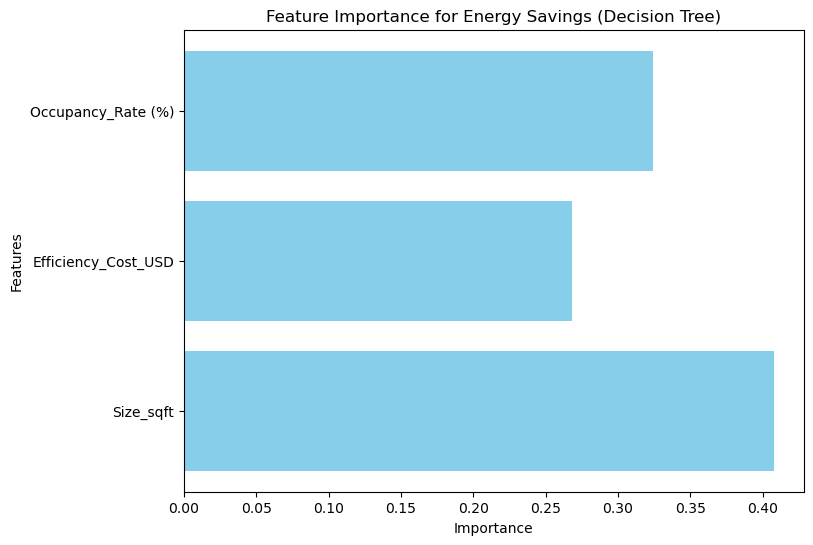

In [21]:
import numpy as np

# Feature importance for energy savings (Decision Tree)
feature_importance = tree_model_savings.feature_importances_
features = X_savings.columns

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.title('Feature Importance for Energy Savings (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


> The feature importance plot for the Decision Tree model predicting energy savings shows that Occupancy_Rate (%) is the most influential feature, suggesting that optimizing energy use based on building occupancy has the greatest impact on energy savings. Efficiency_Cost_USD, representing the cost of implementing efficiency measures, also plays a significant role, indicating that investments in these measures are impactful but need to be targeted effectively. Size_sqft has the least importance, suggesting that while building size affects energy savings, factors like occupancy and efficiency spending are more critical. Overall, the analysis implies that energy savings can be maximized by focusing on efficient energy use during high occupancy and making strategic decisions about efficiency investments.

### Conclusion
>This project demonstrated the effectiveness of energy efficiency measures in reducing energy consumption, costs, and CO2 emissions for commercial buildings. Statistical analyses, including paired t-tests and Wilcoxon Signed-Rank Tests, confirmed that these measures led to significant reductions in energy usage and operational costs. While predictive models such as Linear Regression and Decision Trees struggled to accurately forecast savings due to feature limitations, feature importance analysis revealed that occupancy rate and efficiency costs were the most critical factors influencing energy savings. This suggests that optimizing energy usage during high occupancy and making strategic investments in efficiency improvements can lead to the greatest benefits. The insights gained from this project provide a foundation for better decision-making in implementing energy efficiency strategies, supporting both cost-saving objectives and environmental sustainability goals.